In [1]:
%load_ext autoreload
%autoreload 2

from datasets import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import synthetic data
X, y = import_synthetic()

In [3]:
# Time how long it takes to import synthetic data
%timeit import_synthetic()

464 ms ± 5.51 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
# Get dataset length
len(X), len(y)

(1200, 1200)

In [17]:
# Set dataset number
DSN = 15

In [18]:
X[DSN].head()

,case,step,susceptible,c_infected,recovered,dead
step,,,,,,
0,BA-4-050015,0,493,7,0,0
1,BA-4-050015,1,492,8,0,0
2,BA-4-050015,2,492,8,0,0
3,BA-4-050015,3,490,10,1,0
4,BA-4-050015,4,489,11,1,0


In [19]:
X[DSN].tail()

,case,step,susceptible,c_infected,recovered,dead
step,,,,,,
271,BA-4-050015,271,64,436,309,125
272,BA-4-050015,272,64,436,309,126
273,BA-4-050015,273,64,436,309,126
274,BA-4-050015,274,64,436,309,126
275,BA-4-050015,275,64,436,310,126


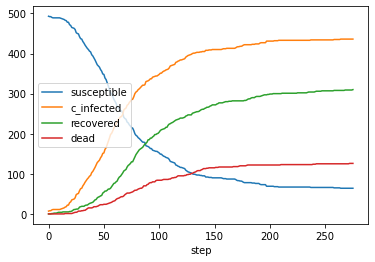

case                BA-4-050015
population                  500
initial_infected              7
infectiousness         0.178386
i_out                  0.412369
i_rec_prop             0.701939
network                      BA
k                             4
Name: 15, dtype: object

In [20]:
# Plot time series data
ax_y = ['susceptible', 'c_infected', 'recovered', 'dead']
X[DSN].plot(y=ax_y, use_index=True)
plt.show()

# Show features
y.iloc[DSN]

In [21]:
# Format X[DSN] and y[DSN] as ndarrays (to be passed to machine learning library)
Xn, yn = synthetic_numpy(X, y)

{"X shape": Xn.shape, "Y shape": y.shape}

{'X shape': (1200, 401, 5), 'Y shape': (1200, 8)}

In [22]:
# Time how long synthetic_numpy takes
%timeit synthetic_numpy(X, y)

315 ms ± 2.32 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
# Time how long it takes to iterate through whole dataset
%timeit for x, y in zip(Xn, yn): pass

387 µs ± 6.95 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [24]:
# Plot ndarray
def plot_numpy(xs: np.ndarray):
    ax_x = 'step'
    ax_y = ['susceptible', 'c_infected', 'recovered', 'dead']
    df = pd.DataFrame(xs, columns=[ax_x] + ax_y)
    df.plot(y=ax_y, x=ax_x)
    plt.show()

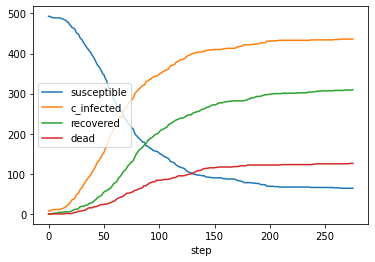

array([0.        , 2.        , 0.17838556, 0.41236947, 0.70193861,
       0.        , 0.        ])

In [26]:
# Plot Xn in numpy format
plot_numpy(Xn[DSN])
yn[DSN]

In [27]:
# Turn Xn into fractions
Xf = to_compartment_fraction(Xn)

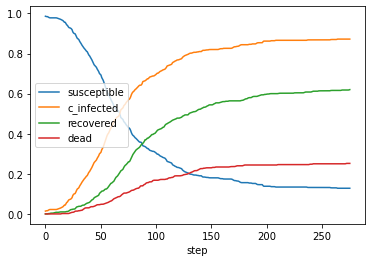

array([0.        , 2.        , 0.17838556, 0.41236947, 0.70193861,
       0.        , 0.        ])

In [28]:
# Plot Xf in numpy format
plot_numpy(Xf[DSN])
yn[DSN]